## For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.
- Has the network latency gone up since we switched internet service providers?
- Is the website redesign any good?
- Is our television ad driving more sales?

## 1) Has the network latency gone up since we switched internet service providers?
### formulate a null and alternative hypothesis 
- There is not change in latency since switching internet providers
- Latency has increasd since switching service providers
### give an example of what a true positive, true negative, type I and type II errors would look like.
- True Positive: Predicted latancy increased when it increased
- True Negative: Predicted latancy decreased when it decreased
- Type I Error(False Positive): Predicted latency increased when it decreased
- Tyupe II Error (False Negative): Predicted latency decreased when it increased

## 2) Is the website redesign any good?
### formulate a null and alternative hypothesis 
- Visits to the website has not changed since the redesign?
- Visits increased in visits since the website redesign?
### give an example of what a true positive, true negative, type I and type II errors would look like.
- True Positive: Predicted Increase and increased
- True Negative: Predicted No Increase and No Increase
- Type I Error(False Positive): Predicted increase and didn't
- Tyupe II Error (False Negative): Predicted no increase and did

## 3) Is our television ad driving more sales?
### formulate a null and alternative hypothesis 
- Sales has not changed since TV ad published
- Sales increased since TV ad published
## give an example of what a true positive, true negative, type I and type II errors would look like.
- True Positive: Predicted visits increase and did
- True Negative: Predicted no increase invisits and didn't
- Type I Error(False Positive): Predicted increase and didn't
- Tyupe II Error (False Negative): Predicted decrease and didn't

## Exercises T-Testing

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.


**Hypothesis**

$H_{0}$: Average time to sell homes is = between Office1 and Office2

$H_{0}$: Average time to sell homes is != between Office1 and Office2

**Significance Levels**

$\alpha$ = .05 

**Verify Assumpiton**

- Normal:
- Independdent:
- Variance:

Test Type:
2 Sample (ind), 2 Tail

In [35]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# set alpha
α = .05

In [37]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)
t, p, α

(-2.7091418459143854, 0.00811206270346016, 0.05)

### p < alpha = reject H0

## Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [38]:
from pydataset import data
mpg = data('mpg')

In [39]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [40]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- H0: Fuel-efficiency has NO DIFFERENCE between 2008 and 1999
- H1: Fuel-efficiency has DIFFERNCE bettween 2008 and 1999

In [41]:
mpg['fuel_efficiency'] = (mpg.cty + mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [42]:
mpg.year.unique()

array([1999, 2008])

In [43]:
cars_2008 = mpg[mpg.year == 2008].fuel_efficiency
cars_2008.head()

3     25.5
4     25.5
7     22.5
10    24.0
11    23.0
Name: fuel_efficiency, dtype: float64

<AxesSubplot:>

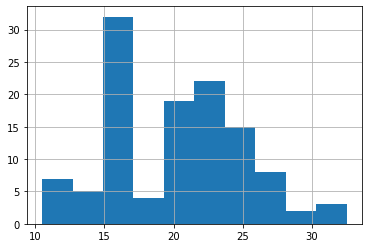

In [44]:
cars_2008.hist()

In [45]:
cars_1999 = mpg[mpg.year == 1999].fuel_efficiency
cars_1999.head()

1    23.5
2    25.0
5    21.0
6    22.0
8    22.0
Name: fuel_efficiency, dtype: float64

<AxesSubplot:>

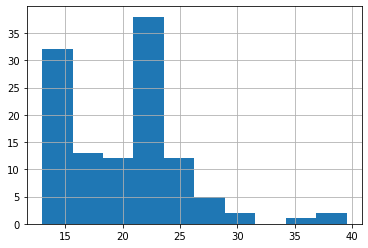

In [46]:
cars_1999.hist()

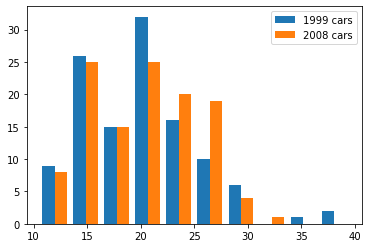

In [47]:
plt.hist([cars_1999, cars_2008], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

In [48]:
cars_1999.var() == cars_2008.var()

False

alpha = .05
normal: Yes
independent: Yes
variance: False

In [49]:
alpha = .05
t, p = stats.ttest_ind(cars_2008, cars_1999, equal_var=False)
t, p, alpha

(-0.21960177245940962, 0.8263750772060638, 0.05)

### 2 sample, 2 tail Test: 
### p > alpha = Fail Reject of H0

## Are compact cars more fuel-efficient than the average car?
### H0: Compact car fuel-efficiency <= Average Car
### H1: Compact car fuel-efficiency > Average Car
#### Test: 1 Sample, 1 Tail

In [50]:
mpg['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [51]:
# find mean of all cars
avg_car_fuel_efficiency = mpg.fuel_efficiency.mean()
avg_car_fuel_efficiency

20.14957264957265

In [52]:
# build Series for compact car fuel efficiency
compact_car = mpg[mpg['class'] == 'compact'].fuel_efficiency
compact_car.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: fuel_efficiency, dtype: float64

<AxesSubplot:>

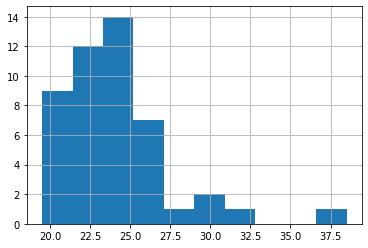

In [53]:
compact_car.hist()

In [54]:
alpha = .05

In [55]:
t, p = stats.ttest_1samp(compact_car,avg_car_fuel_efficiency)
t, p/2, alpha

(7.896888573132535, 2.0992818971585668e-10, 0.05)

### p < alpha and t > 0 = reject H0 (compact car fuel-efficiency > than average car

## Do manual cars get better gas mileage than automatic cars?
### H0: Manuela car gas mileage <= automatic cars gas mileage
### H1: Manual cars gas mileage > automatic cars gas mileage

#### Test: 2 Sample, 1 Tail
#### Normal: Yes
#### Independent: Yes
#### Variance: No

In [56]:
# create series for manual fuel efficiency
manuals = mpg[mpg.trans.str.contains('manual')].fuel_efficiency

In [57]:
# create sereis for automatic fuel efficiency
auto = mpg[mpg.trans.str.contains('auto')].fuel_efficiency

<AxesSubplot:>

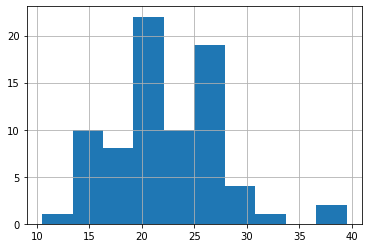

In [58]:
manuals.hist()

<AxesSubplot:>

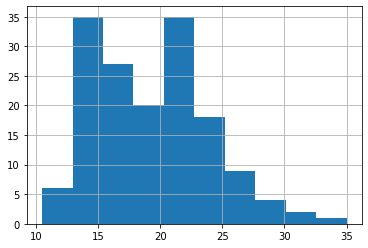

In [59]:
auto.hist()

In [60]:
# check if variances equal
manuals.var() == auto.var()

False

In [61]:
# find t,p for 2 sample test with 1 tail
t, p = stats.ttest_ind(manuals, auto, equal_var=False)
t, p/2, alpha

(4.443514012903071, 8.976124499958965e-06, 0.05)

In [62]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

In [63]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency,transmission_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Auto Transmission
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Manual Transmission
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Manual Transmission
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Auto Transmission
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Auto Transmission


Text(0.5, 1.0, 'Is mileage different by transmission type?')

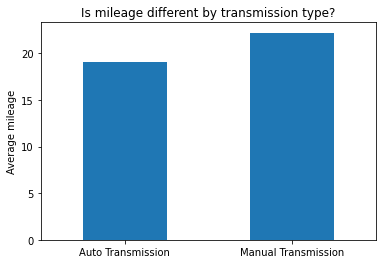

In [64]:
mpg.groupby('transmission_type').fuel_efficiency.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

### p < alpha & t > 0 = reject H0 (manual car gas mileage is > than automatic cars gas mileage 

# Correlation Testing

## 1A) Use the telco_churn data

In [110]:
telco = pd.read_csv('telco_churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1B) Does tenure correlate with monthly charges? 

In [134]:
tenure = telco.tenure
mo_charges = telco.MonthlyCharges
tenure, mo_charges

(0        1
 1       34
 2        2
 3       45
 4        2
         ..
 7038    24
 7039    72
 7040    11
 7041     4
 7042    66
 Name: tenure, Length: 7043, dtype: int64,
 0        29.85
 1        56.95
 2        53.85
 3        42.30
 4        70.70
          ...  
 7038     84.80
 7039    103.20
 7040     29.60
 7041     74.40
 7042    105.65
 Name: MonthlyCharges, Length: 7043, dtype: float64)

In [135]:
corr, p = stats.pearsonr(mo_charges,tenure)
corr, p

(0.24789985628615002, 4.0940449915016345e-99)

## 1C) Total charges? 

In [136]:
total_charges = telco.TotalCharges
total_charges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [137]:
# NAN values were found in dataset, need to replace with number
np.isnan(total_charges).any()

True

In [138]:
# Inf values were not found in dataset
np.isinf(total_charges).any()

False

In [139]:
total_charges = np.nan_to_num(total_charges)
total_charges

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [140]:
np.isnan(total_charges).any()

False

In [179]:
corr, p = stats.pearsonr(tenure,total_charges)
corr, p

(0.8261783979502422, 0.0)

## 1D) What happens if you control for phone and internet service? 
###  

In [151]:
telco.InternetService.value_counts(), telco.PhoneService.value_counts(), telco.MultipleLines.value_counts()

(Fiber optic    3096
 DSL            2421
 No             1526
 Name: InternetService, dtype: int64,
 Yes    6361
 No      682
 Name: PhoneService, dtype: int64,
 No                  3390
 Yes                 2971
 No phone service     682
 Name: MultipleLines, dtype: int64)

In [212]:
fo = telco[telco.InternetService == 'Fiber optic'].InternetService
fo

4       Fiber optic
5       Fiber optic
6       Fiber optic
8       Fiber optic
12      Fiber optic
           ...     
7034    Fiber optic
7035    Fiber optic
7039    Fiber optic
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 3096, dtype: object

In [198]:
fo = telco.InternetService.value_counts()[0].astype('int')
fo

3096

In [200]:
type(fo)

numpy.int64

In [195]:
dsl = telco.InternetService.value_counts()[1]
dsl

2421

In [201]:
type(dsl)

numpy.int64

In [189]:
no_int = telco.InternetService.value_counts()[2]
no_int

1526

In [190]:
phone = telco.PhoneService.value_counts()[0]
phone

6361

In [191]:
no_phone = telco.PhoneService.value_counts()[1]
no_phone

682

In [193]:
one_line = telco.MultipleLines.value_counts()[0]
one_line

3390

In [192]:
multi_line = telco.MultipleLines.value_counts()[1]
multi_line

2971

In [194]:
no_service = telco.MultipleLines.value_counts()[2]
no_service

682

In [210]:
# control for fiber optic (fo)
corr, p = stats.pearsonr(tenure, fo)
corr, p

TypeError: object of type 'numpy.int64' has no len()

In [181]:
# control for (dsl)
corr, p = stats.pearsonr(tenure, dsl)
corr, p

TypeError: object of type 'numpy.int64' has no len()

In [ ]:
# control for no internet (no_int)
corr, p = stats.pearsonr(tenure, no_int)
corr, p

In [ ]:
# control for having (phone)
corr, p = stats.pearsonr(tenure, phone)
corr, p

In [ ]:
# control for having (no_phone)
corr, p = stats.pearsonr(tenure, no_phone)
corr, p

In [ ]:
# control for having (one_line)
corr, p = stats.pearsonr(tenure, one_line)
corr, p

In [ ]:
# control for having (multi_line)
corr, p = stats.pearsonr(tenure, mult_line)
corr, p

## 2A) Use the employees database.

In [215]:
def get_db_url(db_name):
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [216]:
url = get_db_url('employees')

In [219]:
sql = '''
SELECT * 
FROM employees
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()
'''



In [220]:
salaries = pd.read_sql(sql,url)
salaries.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


## 2B) Is there a relationship between how long an employee has been with the company and their salary?

In [243]:
salaries.dtypes

emp_no                 int64
birth_date            object
first_name            object
last_name             object
gender                object
hire_date     datetime64[ns]
salary                 int64
from_date             object
to_date               object
dtype: object

In [242]:
# converted hire date from object to datetime
salaries['hire_date'] = pd.to_datetime(salaries['hire_date'])
salaries

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01


In [249]:
# added column for difference between hire date and now
salaries['emp_tenure'] = (pd.Timestamp.now() - salaries.hire_date)
salaries

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,emp_tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,12916 days 15:07:08.133261
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,13133 days 15:07:08.133261
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,12853 days 15:07:08.133261
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,12758 days 15:07:08.133261
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,11742 days 15:07:08.133261
...,...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01,10524 days 15:07:08.133261
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01,11362 days 15:07:08.133261
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01,12982 days 15:07:08.133261
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,10250 days 15:07:08.133261


In [280]:
# Pulled days from the datetime delta values
salaries.emp_tenure = salaries.emp_tenure.dt.days

AttributeError: Can only use .dt accessor with datetimelike values

In [287]:
# confirmed emp_tenure changed from datetime to int
salaries.dtypes

emp_no                 int64
birth_date            object
first_name            object
last_name             object
gender                object
hire_date     datetime64[ns]
salary                 int64
from_date             object
to_date               object
emp_tenure             int64
dtype: object

In [296]:
salary = salaries.salary
emp_tenure = salaries.emp_tenure

In [297]:
# Is there a correlation between employee tenure and employee salary
corr, p = stats.pearsonr(salary, emp_days)
corr, p

(0.3064625613186077, 0.0)

## 2C) Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [329]:
sql = '''
SELECT *
FROM employees
RIGHT JOIN titles t USING (emp_no)

'''

In [330]:
emp_tenure_titles = pd.read_sql(sql,url)
emp_tenure_titles.head()

,emp_no,title,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,10001,Senior Engineer,1986-06-26,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,Staff,1996-08-03,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,Senior Engineer,1995-12-03,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,Engineer,1986-12-01,1995-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01


In [331]:
emp_tenure_titles.emp_no.value_counts()

436073    3
471022    3
237395    3
33903     3
46951     3
         ..
217861    1
213767    1
211720    1
209673    1
10235     1
Name: emp_no, Length: 300024, dtype: int64

In [326]:
emp_tenure_titles.dtypes

emp_no         int64
title         object
from_date     object
to_date       object
birth_date    object
first_name    object
last_name     object
gender        object
hire_date     object
dtype: object

In [327]:
# converted hire date from object to datetime
emp_tenure_titles['hire_date'] = pd.to_datetime(emp_tenure_titles['hire_date'])
emp_tenure_titles

,emp_no,title,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,10001,Senior Engineer,1986-06-26,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,Staff,1996-08-03,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,Senior Engineer,1995-12-03,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,Engineer,1986-12-01,1995-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01
...,...,...,...,...,...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29,1961-08-03,Berhard,Lenart,M,1986-04-21
443304,499997,Senior Engineer,1992-08-29,9999-01-01,1961-08-03,Berhard,Lenart,M,1986-04-21
443305,499998,Senior Staff,1998-12-27,9999-01-01,1956-09-05,Patricia,Breugel,M,1993-10-13
443306,499998,Staff,1993-12-27,1998-12-27,1956-09-05,Patricia,Breugel,M,1993-10-13


In [315]:
# added column for difference between hire date and now
emp_tenure_titles['emp_tenure'] = (pd.Timestamp.now() - emp_tenure_titles.hire_date)
emp_tenure_titles

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date,emp_tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,12916 days 15:56:48.921401
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,13133 days 15:56:48.921401
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,12853 days 15:56:48.921401
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,12758 days 15:56:48.921401
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,12758 days 15:56:48.921401
...,...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29,12982 days 15:56:48.921401
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01,12982 days 15:56:48.921401
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01,10250 days 15:56:48.921401
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27,10250 days 15:56:48.921401


In [316]:
# Pulled days from the datetime delta values
emp_tenure_titles.emp_tenure = emp_tenure_titles.emp_tenure.dt.days
emp_tenure_titles

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date,emp_tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,12916
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,13133
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,12853
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,12758
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,12758
...,...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29,12982
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01,12982
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01,10250
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27,10250


In [310]:
salaries.title.count

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,emp_tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,12916


In [320]:
tenure_groupby = emp_tenure_titles.groupby(by='emp_no')
tenure_groupby

## 3A) Use the sleepstudy data.

In [ ]:
from pydataset import data

In [ ]:
df = data('sleepstudy')
df.head()

## 3B) Is there a relationship between days and reaction time?